In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.metrics import root_mean_squared_error
from seaborn import regplot

Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday) of infections in US. X-Axis - number of days, Y-Axis - number of new cases and deaths. (10 points)

### Load data

In [2]:
cases = pd.read_csv('./data/covid_cases_weekly', index_col=0)
deaths = pd.read_csv('./data/covid_deaths_weekly', index_col=0)

### Calculate new cases/deaths over time and plot

In [3]:
case_sums = cases[cases.columns[5:]].sum()
death_sums = deaths[deaths.columns[5:]].sum()

In [4]:
new_cases = case_sums.diff()[1:]
new_deaths = death_sums.diff()[1:]

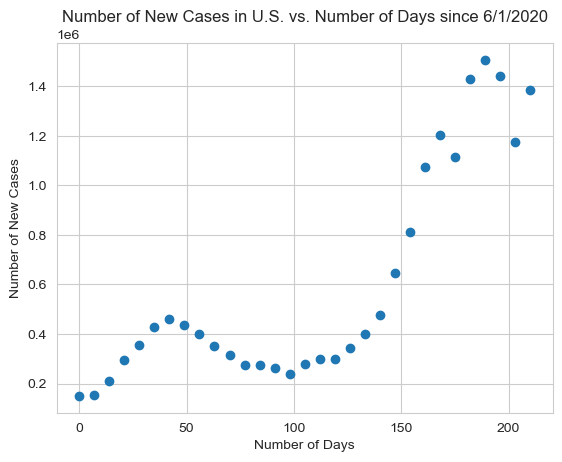

In [5]:
x = np.arange(len(new_cases)) * 7  # Get the number of days since the start of the date range
plt.scatter(x, new_cases)
plt.title('Number of New Cases in U.S. vs. Number of Days since 6/1/2020')
plt.xlabel('Number of Days')
plt.ylabel('Number of New Cases')
plt.show()

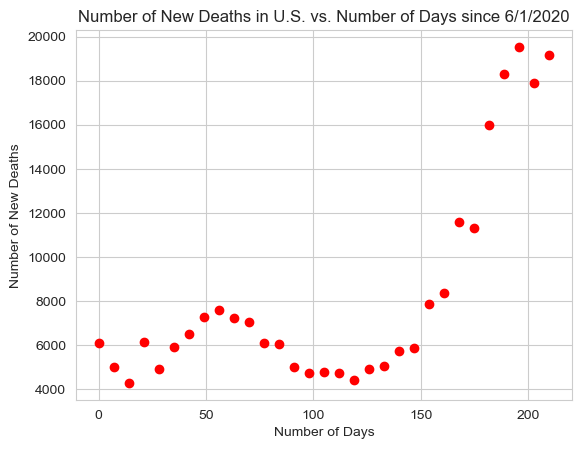

In [6]:
plt.scatter(x, new_deaths, color='red')
plt.title('Number of New Deaths in U.S. vs. Number of Days since 6/1/2020')
plt.xlabel('Number of Days')
plt.ylabel('Number of New Deaths')
plt.show()

### Linear Regression Models

In [68]:
cases_linear = polyfit(x, new_cases, 1)
deaths_linear = polyfit(x, new_deaths, 1)

cases_pred_linear = polyval(x, cases_linear)
deaths_pred_linear = polyval(x, deaths_linear)

### Non-Linear Regression Models

Degree 2

In [8]:
cases_poly2 = polyfit(x, new_cases, 2)
deaths_poly2 = polyfit(x, new_deaths, 2)

cases_pred_poly2 = polyval(x, cases_poly2)
deaths_pred_poly2 = polyval(x, deaths_poly2)

Degree 3

In [9]:
cases_poly3 = polyfit(x, new_cases, 3)
deaths_poly3 = polyfit(x, new_deaths, 3)

cases_pred_poly3 = polyval(x, cases_poly3)
deaths_pred_poly3 = polyval(x, deaths_poly3)

---

### Root Mean Square Error

Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). https://en.wikipedia.org/wiki/Root-mean-square_deviation. Discuss bias versus variance tradeoff. (10 points)

In [69]:
linear_cases_rmse = root_mean_squared_error(new_cases, cases_pred_linear)
linear_deaths_rmse = root_mean_squared_error(new_deaths, deaths_pred_linear)

poly2_cases_rmse = root_mean_squared_error(new_cases, cases_pred_poly2)
poly2_deaths_rmse = root_mean_squared_error(new_deaths, deaths_pred_poly2)

poly3_cases_rmse = root_mean_squared_error(new_cases, cases_pred_poly3)
poly3_deaths_rmse = root_mean_squared_error(new_deaths, deaths_pred_poly3)

rmse_data = {
    'Model': ['Linear', 'Polynomial Degree 2', 'Polynomial Degree 3'],
    'Cases RMSE': [linear_cases_rmse, poly2_cases_rmse, poly3_cases_rmse],
    'Deaths RMSE': [linear_deaths_rmse, poly2_deaths_rmse, poly3_deaths_rmse]
}

rmse_df = pd.DataFrame(rmse_data).set_index('Model')
rmse_df

,Cases RMSE,Deaths RMSE
Model,,
Linear,244257.677545,3291.912625
Polynomial Degree 2,163853.477908,1954.992175
Polynomial Degree 3,160294.084748,1361.734158


As we can see, the polynomial degree 3 model has the lowest Root Mean Squared Error for both the cases and deaths data.

---

### Predictive Trendline

Plot trend line along for the data along with the forecast of 1 week ahead (i.e. make prediction on 2021.01.04 - 2021.01.10). (10 points)
Describe the trends as compared to other countries. (10 points)

In [11]:
one_week_ahead = np.array(x[-1] + 7).reshape(1, -1)

In [80]:
def plot_trendline(scatter_data, model, title_str, label_str, color_str, order):
    axes = regplot(scatter_data, x=x, y=scatter_data, order=order, truncate=False, label=label_str, color=color_str)
    prediction = polyval(one_week_ahead, model)
    axes.scatter(one_week_ahead, prediction, color='green', label='Prediction')
    axes.set_title(title_str)
    axes.set_xlabel('Days')
    axes.set_ylabel(label_str)
    axes.annotate(f"{int(prediction[0][0])}", (one_week_ahead, prediction),
                textcoords="offset points", xytext=(10, -15), ha='center', color='green')
    axes.legend()
    plt.show()

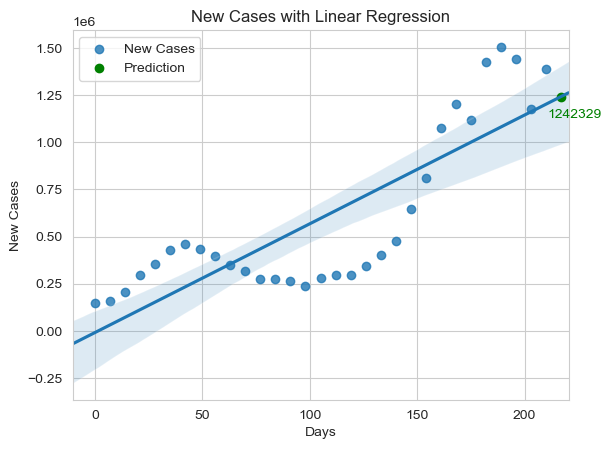

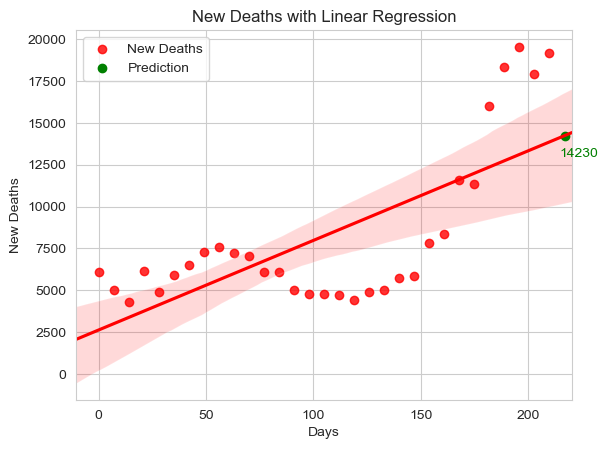

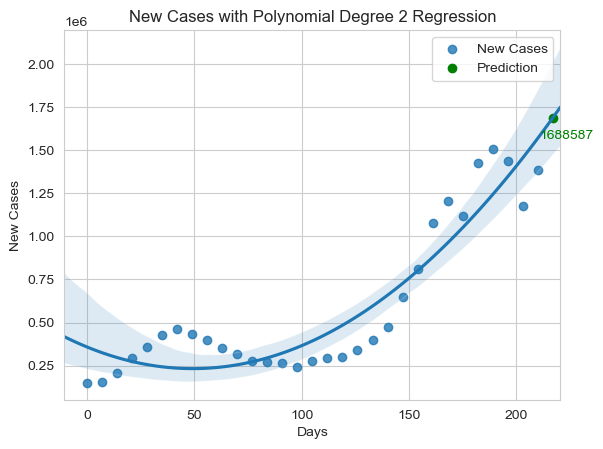

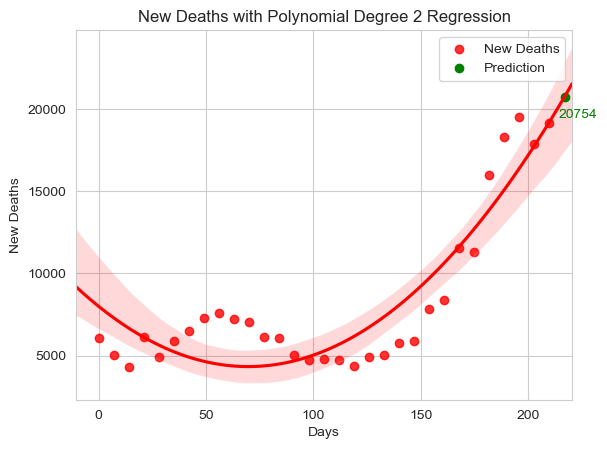

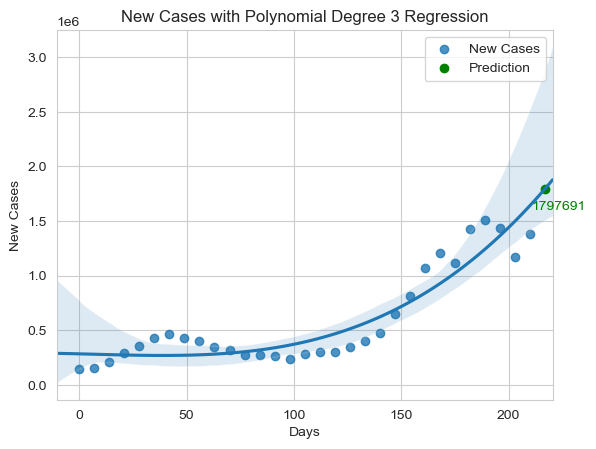

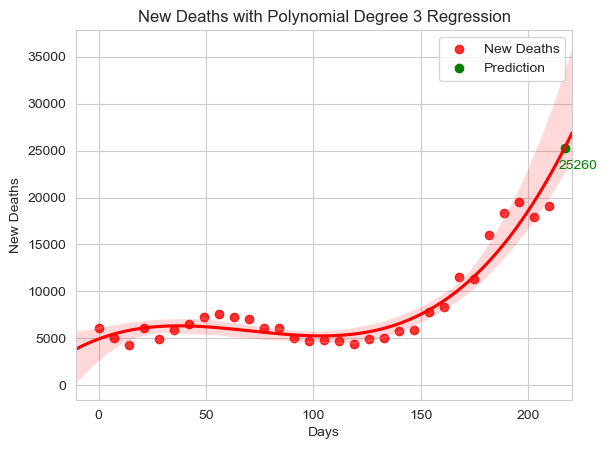

In [81]:
trendline_data = {
    'New Cases with Linear Regression': (cases_linear, new_cases, 'New Cases', 'tab:blue', 1),
    'New Deaths with Linear Regression': (deaths_linear, new_deaths, 'New Deaths', 'red', 1),
    'New Cases with Polynomial Degree 2 Regression': (cases_poly2, new_cases, 'New Cases', 'tab:blue', 2),
    'New Deaths with Polynomial Degree 2 Regression': (deaths_poly2, new_deaths, 'New Deaths', 'red', 2),
    'New Cases with Polynomial Degree 3 Regression': (cases_poly3, new_cases, 'New Cases', 'tab:blue', 3),
    'New Deaths with Polynomial Degree 3 Regression': (deaths_poly3, new_deaths, 'New Deaths', 'red', 3),
}

for title, params in trendline_data.items():
    model, scatter_data, label_str, color_str, order = params
    plot_trendline(scatter_data, model, title, label_str, color_str, order)


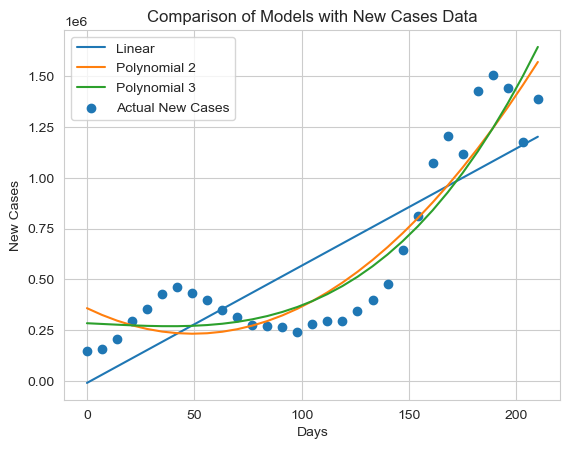

In [18]:
cases_models = {
    'Linear': cases_pred_linear,
    'Polynomial 2': cases_pred_poly2,
    'Polynomial 3': cases_pred_poly3
}

for label, model_preds in cases_models.items():
    plt.plot(x, model_preds, label=label)
plt.title('Comparison of Models with New Cases Data')
plt.xlabel('Days')
plt.ylabel('New Cases')
plt.scatter(x, new_cases, label='Actual New Cases')
plt.legend()
plt.show()

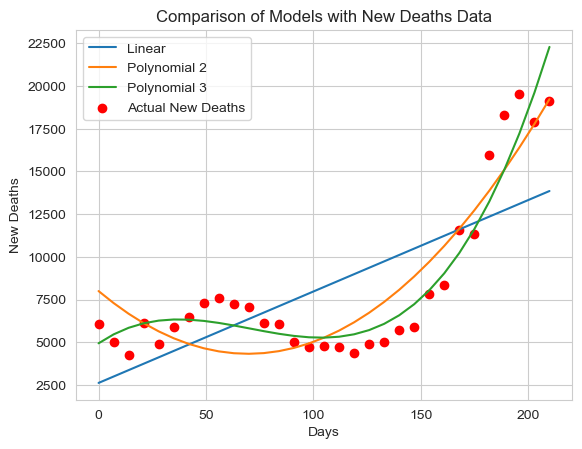

In [19]:
deaths_models = {
    'Linear': deaths_pred_linear,
    'Polynomial 2': deaths_pred_poly2,
    'Polynomial 3': deaths_pred_poly3
}

for label, model_preds in deaths_models.items():
    plt.plot(x, model_preds, label=label)
plt.title('Comparison of Models with New Deaths Data')
plt.xlabel('Days')
plt.ylabel('New Deaths')
plt.scatter(x, new_deaths, label='Actual New Deaths', color='red')
plt.legend()
plt.show()

### Country Comparison

In [67]:
world_covid_deaths = pd.read_csv('./data/world_countries_deaths_compare.csv', index_col=0)
world_new_deaths = world_covid_deaths.diff(axis=1)
world_new_deaths = world_new_deaths.drop(world_new_deaths.columns[0], axis=1)
world_new_deaths = world_new_deaths.T

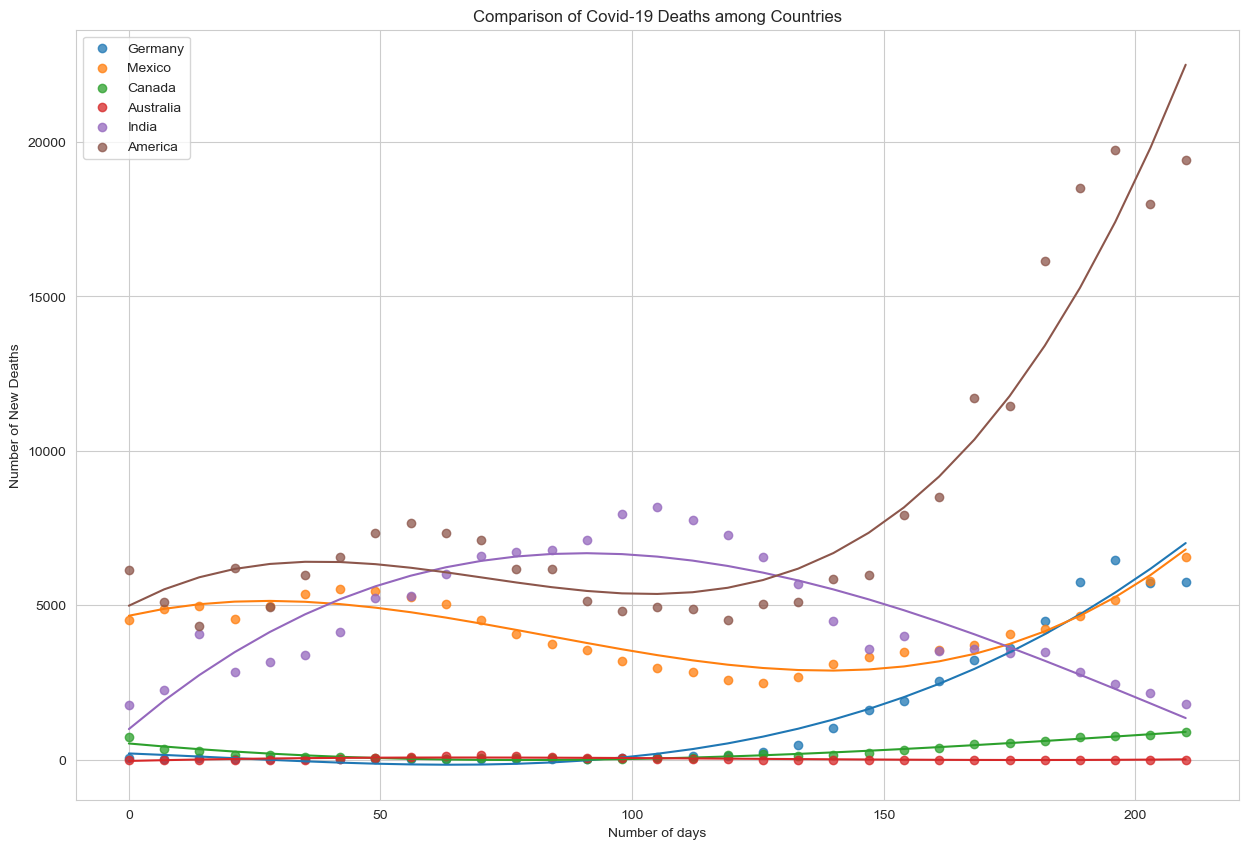

In [66]:
plt.figure(figsize=(15, 10))
for country in world_new_deaths.columns:
    new_deaths_country = world_new_deaths[country]
    plt.scatter(x, new_deaths_country, label=country, alpha=0.75)
    world_deaths_poly3 = polyfit(x, new_deaths_country, 3)  # we use polynomial degree 3 as it previously performed the best
    plt.plot(x, polyval(x, world_deaths_poly3))

plt.title('Comparison of Covid-19 Deaths among Countries')
plt.xlabel('Number of days')
plt.ylabel('Number of New Deaths')
plt.legend()
plt.show()

The most obvious takeaway is the U.S. has many more deaths than the other countries. Interestingly, India is the only country that has a downward trend at the end of the date range. Both Australia and Canada had very few deaths over the date range, likely due to the excellent response to the virus.